# lab 9

1. https://docs.opencv.org/3.4/dc/d0d/tutorial_py_features_harris.html

2. https://docs.opencv.org/3.4/d4/d8c/tutorial_py_shi_tomasi.html

3. https://docs.opencv.org/3.4/da/df5/tutorial_py_sift_intro.html

# pt1

In [2]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

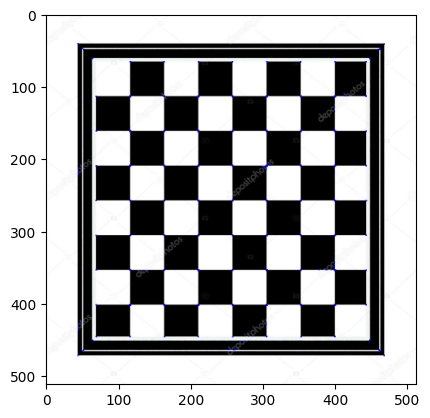

In [9]:
filename = 'resources/lab9/chessboard.jpg'
img = cv.imread(filename)
assert img is not None, "file could not be read, check with os.path.exists()"

# Преобразование в оттенки серого
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
gray = np.float32(gray)

# Вычисление углов Харриса
dst = cv.cornerHarris(gray, 2, 3, 0.04)

# Результат расширяется для выделения углов
dst = cv.dilate(dst, None)

# Порог для оптимального значения
img[dst > 0.01 * dst.max()] = [0, 0, 255]

# Изменение размера изображения для отображения
scale_percent = 50  # Процент уменьшения (например, 50% от оригинального размера)
width = int(img.shape[1] * scale_percent / 100)
height = int(img.shape[0] * scale_percent / 100)
dim = (width, height)

# Изменение размера изображения
resized_img = cv.resize(img, dim, interpolation=cv.INTER_AREA)

# Отображение результата
plt.imshow(resized_img)


if cv.waitKey(0) & 0xff == 27:
    cv.destroyAllWindows()


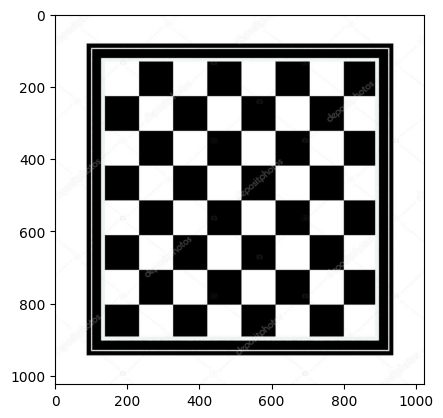

In [ ]:
filename = 'resources/lab9/chessboard.jpg'
img = cv.imread(filename)
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Найти углы Харриса
gray = np.float32(gray)
dst = cv.cornerHarris(gray, 2, 3, 0.04)
dst = cv.dilate(dst, None)

# Порог для оптимального значения
ret, dst = cv.threshold(dst, 0.01 * dst.max(), 255, 0)
dst = np.uint8(dst)

# Найти центроиды
ret, labels, stats, centroids = cv.connectedComponentsWithStats(dst)

# Определить критерии остановки и уточнения углов
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.001)
corners = cv.cornerSubPix(gray, np.float32(centroids), (5, 5), (-1, -1), criteria)

# Теперь нарисуем их
res = np.hstack((centroids, corners))
res = res.astype(np.int32)  # Исправлено здесь
img[res[:, 1], res[:, 0]] = [0, 0, 255]    # Красные углы
img[res[:, 3], res[:, 2]] = [0, 255, 0]    # Зеленые уточненные углы

plt.imshow(img)


# pt2

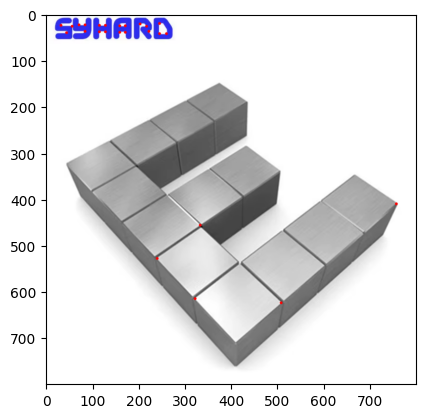

(<matplotlib.image.AxesImage at 0x29992362390>, None)

In [18]:
filename = 'resources/lab9/img3.png'
img = cv.imread(filename)
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
corners = cv.goodFeaturesToTrack(gray,25,0.01,10)
corners = np.int32(corners)
for i in corners:
    x,y = i.ravel()
    cv.circle(img,(x,y),3,255,-1)
plt.imshow(img),plt.show()

# pt3

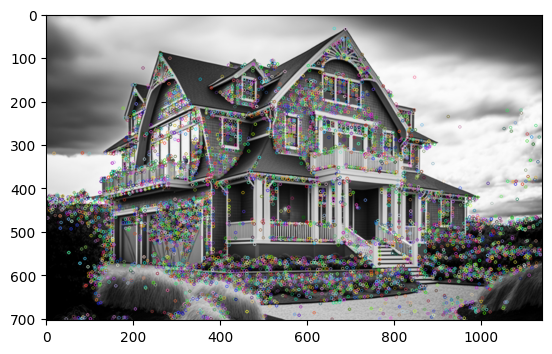

In [ ]:
filename = 'resources/lab9/home.png'
img = cv.imread(filename)
gray= cv.cvtColor(img,cv.COLOR_BGR2GRAY)
sift = cv.SIFT_create()
kp = sift.detect(gray,None)
img=cv.drawKeypoints(gray,kp,img)

plt.imshow(img)

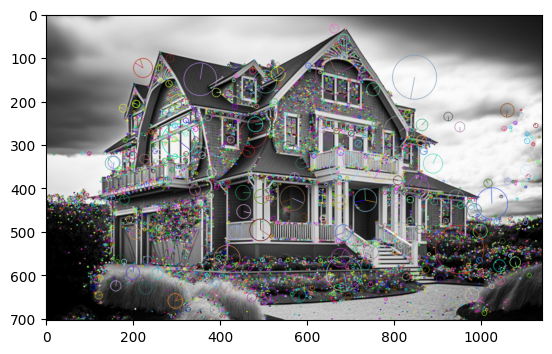

In [ ]:
img=cv.drawKeypoints(gray,kp,img,flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(img)

In [22]:
sift = cv.SIFT_create()
kp, des = sift.detectAndCompute(gray,None)